# TASK

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import chi2_contingency, pearsonr, spearmanr, kendalltau, shapiro, normaltest,f_oneway, ttest_ind, ttest_rel, ttest_1samp
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("hls")

In [190]:
data_churn = pd.read_csv('data_churn.csv')
data_churn.head()

data_churn['Churn'] = data_churn['Churn'].map({'Yes': 1, 'No': 0})
data_churn

,Customer_ID,Gender,Age,Region,Membership_Level,Monthly_Income,Spending_Score,Online_Spend,Instore_Spend,Satisfaction_Score,Churn,Last_Purchase_Days,Referral_Count,Clicks_Last_Month,Support_Tickets
0,1,Male,34,East,Gold,4496.03,51.65,198.73,352.90,2,1,333,2,13,0
1,2,Female,26,South,Silver,5649.09,1.53,148.98,299.15,1,0,283,0,10,0
2,3,Male,50,North,Gold,4108.45,93.90,136.93,290.48,8,0,53,2,13,2
3,4,Male,37,West,Silver,4711.51,42.07,225.37,375.14,4,0,66,1,17,1
4,5,Male,30,South,Silver,4245.28,40.83,153.27,333.23,3,0,101,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Male,62,North,Gold,4207.95,98.87,242.17,363.43,1,1,333,5,22,0
996,997,Male,52,East,Platinum,5359.38,5.10,208.59,357.12,4,1,278,0,18,1
997,998,Female,23,North,Gold,5726.24,96.81,245.93,440.95,9,1,339,1,15,0
998,999,Female,36,East,Gold,3844.15,55.44,251.27,338.96,9,0,12,1,10,0


# 1. Berapa rata-rata pengeluaran online dan instore berdasarkan gender?

In [191]:
avg_spending_gender = data_churn.groupby('Gender')[['Online_Spend', 'Instore_Spend']].mean()
avg_spending_gender

,Online_Spend,Instore_Spend
Gender,,
Female,199.111431,302.900137
Male,198.330510,301.573633


# 2. Buatlah summary statistik dari Spending Score per Membership Level.

In [192]:
summary_spending = data_churn.groupby('Membership_Level')['Spending_Score'].describe()
summary_spending

,count,mean,std,min,25%,50%,75%,max
Membership_Level,,,,,,,,
Basic,246.0,49.869634,29.384724,1.62,23.5675,50.29,75.7525,99.64
Gold,229.0,52.192664,28.171272,2.44,30.2700,52.84,77.0300,99.47
Platinum,277.0,46.648556,29.001178,1.02,20.6500,45.84,69.9700,99.76
Silver,248.0,51.323145,28.686209,1.31,29.2100,50.56,77.4300,99.69


# 3. Buatlah crosstab antara Region dan Churn. Apa insightnya?

In [193]:
crosstab_region_churn = pd.crosstab(data_churn['Region'], data_churn['Churn'], margins=True)
crosstab_region_churn

Churn,0,1,All
Region,,,
East,181,50,231
North,196,51,247
South,213,55,268
West,200,54,254
All,790,210,1000


In [194]:
crosstab_pct = pd.crosstab(data_churn['Region'], data_churn['Churn'], normalize='index') * 100
crosstab_pct

Churn,0,1
Region,,
East,78.354978,21.645022
North,79.352227,20.647773
South,79.477612,20.522388
West,78.740157,21.259843


# 4.  Visualisasikan distribusi Age dan bandingkan berdasarkan gender.

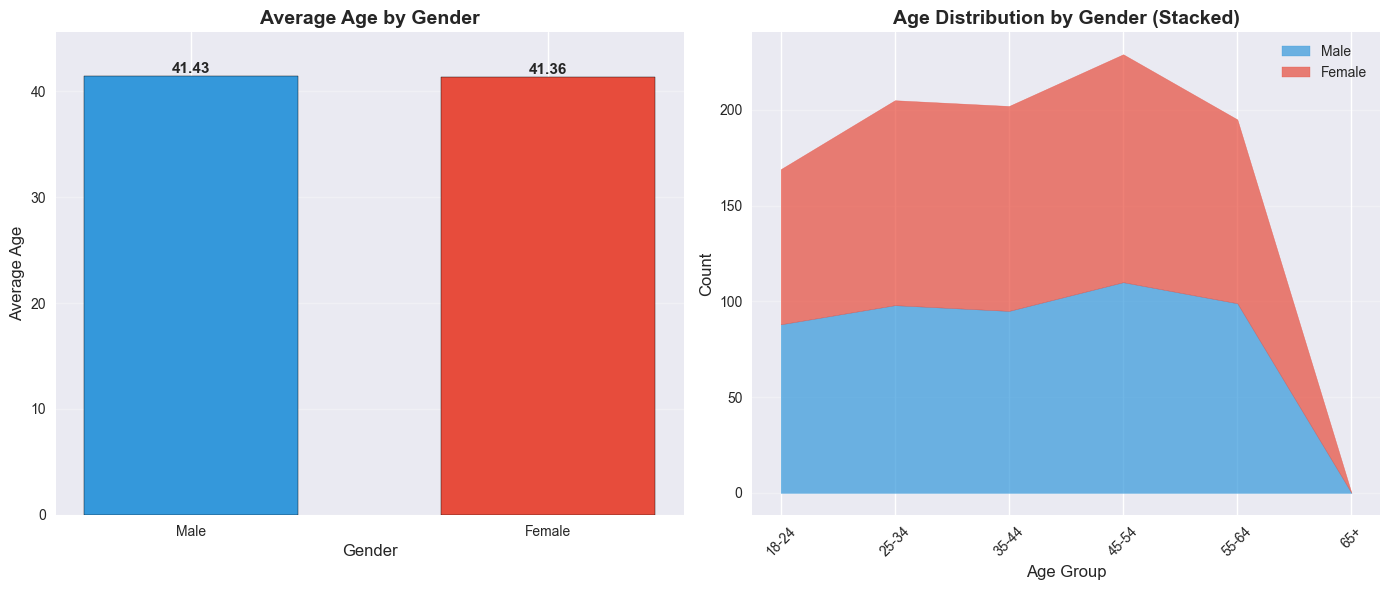


Statistik Age per Gender:


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,510.0,41.356863,13.568067,18.0,29.0,42.0,52.75,64.0
Male,490.0,41.428571,13.812208,18.0,30.0,42.0,54.00,64.0


In [ ]:
plt.figure(figsize=(14, 6))

# Bar Chart - Rata-rata Age per Gender
plt.subplot(1, 2, 1)
age_by_gender = data_churn.groupby('Gender')['Age'].mean().sort_values(ascending=False)
colors_bar = ['#3498db', '#e74c3c']
bars = plt.bar(age_by_gender.index, age_by_gender.values, color=colors_bar, edgecolor='black', width=0.6)

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Average Age by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, age_by_gender.max() * 1.1)

# Stacked Area Plot - Distribusi Age per Gender
plt.subplot(1, 2, 2)
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Hitung distribusi per gender
male_dist = pd.cut(data_churn[data_churn['Gender'] == 'Male']['Age'], 
                   bins=age_bins, labels=age_labels, include_lowest=True).value_counts().sort_index()
female_dist = pd.cut(data_churn[data_churn['Gender'] == 'Female']['Age'], 
                     bins=age_bins, labels=age_labels, include_lowest=True).value_counts().sort_index()

# Stacked area plot
x = range(len(age_labels))
plt.fill_between(x, 0, male_dist.values, alpha=0.7, label='Male', color='#3498db')
plt.fill_between(x, male_dist.values, male_dist.values + female_dist.values, 
                 alpha=0.7, label='Female', color='#e74c3c')

plt.xticks(x, age_labels, rotation=45)
plt.title('Age Distribution by Gender (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nStatistik Age per Gender:")
data_churn.groupby('Gender')['Age'].describe()

# 5. Buatlah bar chart rata-rata Satisfaction_Score untuk tiap Region.

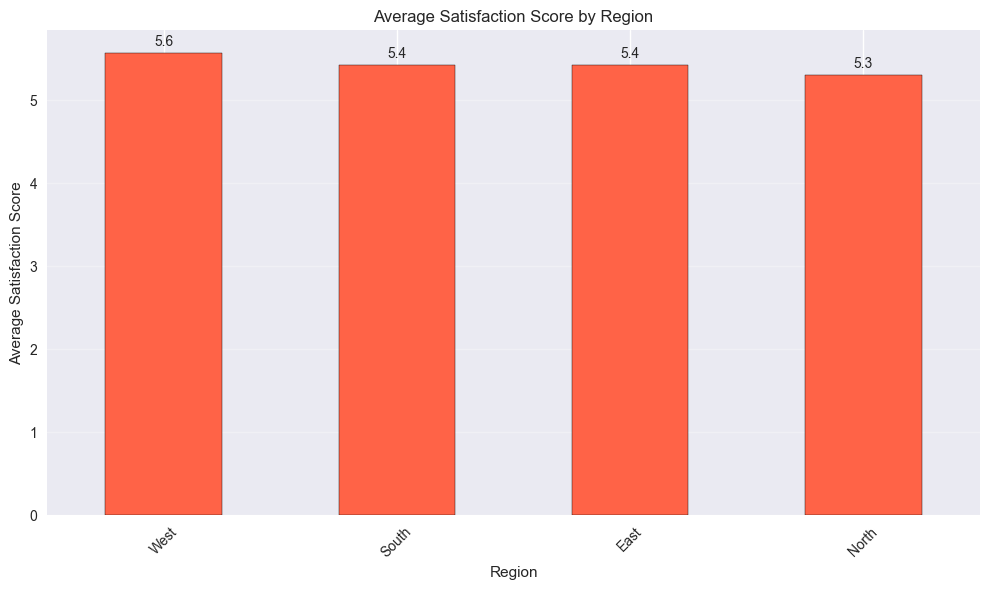

Region
West     5.562992
South    5.421642
East     5.419913
North    5.303644
Name: Satisfaction_Score, dtype: float64

In [217]:
avg_satisfaction = data_churn.groupby('Region')['Satisfaction_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = avg_satisfaction.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Average Satisfaction Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

avg_satisfaction

# 6. Apakah terdapat perbedaan signifikan rata-rata Online_Spend antara pria dan wanita? 

In [ ]:
male_online = data_churn[data_churn['Gender'] == 'Male']['Online_Spend']
female_online = data_churn[data_churn['Gender'] == 'Female']['Online_Spend']

t_stat, p_value = ttest_ind(male_online, female_online)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Terdapat perbedaan signifikan' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan'}")
print()

T-statistic: -0.2448
P-value: 0.8067

Kesimpulan (alpha=0.05): Tidak terdapat perbedaan signifikan



# 7. Apakah terdapat perbedaan Last_Purchase_Days antara pelanggan churn dan tidak churn? 

In [214]:
churn_yes = data_churn[data_churn['Churn'] == 1]['Last_Purchase_Days']
churn_no = data_churn[data_churn['Churn'] == 0]['Last_Purchase_Days']

t_stat, p_value = ttest_ind(churn_yes, churn_no)
print(f"Mean Churn=1: {churn_yes.mean()}")
print(f"Mean Churn=0: {churn_no.mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Terdapat perbedaan signifikan' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan'}")
print()

Mean Churn=1: 185.32857142857142
Mean Churn=0: 177.80632911392405
T-statistic: 0.9054459489422996
P-value: 0.36544771594792624

Kesimpulan (alpha=0.05): Tidak terdapat perbedaan signifikan



# 8. Apakah rata-rata Monthly_Income pelanggan berbeda secara signifikan dari 6000? 

In [199]:
t_stat, p_value = ttest_1samp(data_churn['Monthly_Income'], 6000)
print(f"Mean Monthly_Income: {data_churn['Monthly_Income'].mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Berbeda signifikan dari 6000' if p_value < 0.05 else 'Tidak berbeda signifikan dari 6000'}")
print()

Mean Monthly_Income: 5059.560390000001
T-statistic: -19.96628377881788
P-value: 6.751969600066155e-75

Kesimpulan (alpha=0.05): Berbeda signifikan dari 6000



# 9. Apakah rata-rata Clicks_Last_Month secara signifikan berbeda dari 12? 

In [200]:
t_stat, p_value = ttest_1samp(data_churn['Clicks_Last_Month'], 12)
print(f"Mean Clicks_Last_Month: {data_churn['Clicks_Last_Month'].mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Berbeda signifikan dari 12' if p_value < 0.05 else 'Tidak berbeda signifikan dari 12'}")
print()

Mean Clicks_Last_Month: 15.12
T-statistic: 25.633762095772838
P-value: 8.967855100517752e-112

Kesimpulan (alpha=0.05): Berbeda signifikan dari 12



# 10. Apakah terdapat perbedaan signifikan antara Online_Spend dan Instore_Spend? 

In [201]:
t_stat, p_value = ttest_rel(data_churn['Online_Spend'], data_churn['Instore_Spend'])
print(f"Mean Online_Spend: {data_churn['Online_Spend'].mean()}")
print(f"Mean Instore_Spend: {data_churn['Instore_Spend'].mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Terdapat perbedaan signifikan' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan'}")
print()

Mean Online_Spend: 198.72878000000003
Mean Instore_Spend: 302.25015
T-statistic: -41.32530291522725
P-value: 1.8813132910119115e-218

Kesimpulan (alpha=0.05): Terdapat perbedaan signifikan



# 11. Apakah terdapat perbedaan signifikan antara Satisfaction_Score dan jumlah Support_Tickets? 

In [202]:
correlation, p_value = pearsonr(data_churn['Satisfaction_Score'], data_churn['Support_Tickets'])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan: {'Terdapat korelasi signifikan' if p_value < 0.05 else 'Tidak terdapat korelasi signifikan'}")
print()

Correlation: 0.0382544997771149
P-value: 0.22680006808552627

Kesimpulan: Tidak terdapat korelasi signifikan



# 12. Apakah Spending_Score berbeda signifikan antar level keanggotaan? 

In [203]:
groups = [data_churn[data_churn['Membership_Level'] == level]['Spending_Score'] 
          for level in data_churn['Membership_Level'].unique()]

f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Terdapat perbedaan signifikan' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan'}")
print()

F-statistic: 1.858220008520782
P-value: 0.1349825165274397

Kesimpulan (alpha=0.05): Tidak terdapat perbedaan signifikan



# 13. Apakah Last_Purchase_Days berbeda signifikan antar wilayah? 

In [204]:
groups = [data_churn[data_churn['Region'] == region]['Last_Purchase_Days'] 
          for region in data_churn['Region'].unique()]

f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan (alpha=0.05): {'Terdapat perbedaan signifikan' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan'}")
print()

F-statistic: 0.8869734166145495
P-value: 0.44729057543124817

Kesimpulan (alpha=0.05): Tidak terdapat perbedaan signifikan



# 14. Apakah pelanggan yang churn memiliki satisfaction score yang lebih rendah secara statistik?

In [213]:
# Cek dulu apakah ada missing values
print("Missing values in Satisfaction_Score:", data_churn['Satisfaction_Score'].isna().sum())
print("Missing values in Churn:", data_churn['Churn'].isna().sum())

# Hapus missing values sebelum analisis
churn_yes_sat = data_churn[data_churn['Churn'] == 1]['Satisfaction_Score'].dropna()
churn_no_sat = data_churn[data_churn['Churn'] == 0]['Satisfaction_Score'].dropna()

print(f"\nJumlah data Churn = 1: {len(churn_yes_sat)}")
print(f"Jumlah data Churn = 0: {len(churn_no_sat)}")

t_stat, p_value = ttest_ind(churn_yes_sat, churn_no_sat)
print(f"\nMean Satisfaction (Churn=1): {churn_yes_sat.mean()}")
print(f"Mean Satisfaction (Churn=0): {churn_no_sat.mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan: {'Ya, pelanggan churn memiliki satisfaction score lebih rendah' if (p_value < 0.05 and churn_yes_sat.mean() < churn_no_sat.mean()) else 'Tidak terbukti'}")
print()

Missing values in Satisfaction_Score: 0
Missing values in Churn: 0

Jumlah data Churn = 1: 210
Jumlah data Churn = 0: 790

Mean Satisfaction (Churn=1): 5.442857142857143
Mean Satisfaction (Churn=0): 5.424050632911392
T-statistic: 0.08133123967747731
P-value: 0.9351948377963217

Kesimpulan: Tidak terbukti



# 15. Adakah hubungan antara Referral_Count dan Membership_Level?

In [206]:
data_churn['Referral_Category'] = pd.cut(data_churn['Referral_Count'], bins=3, labels=['Low', 'Medium', 'High'])
crosstab = pd.crosstab(data_churn['Referral_Category'], data_churn['Membership_Level'])
display(crosstab)

chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"\nChi-square: {chi2}")
print(f"P-value: {p_value}")
print(f"Kesimpulan: {'Terdapat hubungan signifikan' if p_value < 0.05 else 'Tidak terdapat hubungan signifikan'}")
print()

Membership_Level,Basic,Gold,Platinum,Silver
Referral_Category,,,,
Low,209,180,214,201
Medium,33,45,59,44
High,4,4,4,3



Chi-square: 6.217793594221207
P-value: 0.3992403758987948
Kesimpulan: Tidak terdapat hubungan signifikan



# 16. Apakah Support_Tickets berkorelasi negatif dengan Satisfaction_Score?

Correlation: 0.0382544997771149
P-value: 0.22680006808552627

Kesimpulan: Tidak terbukti berkorelasi negatif signifikan


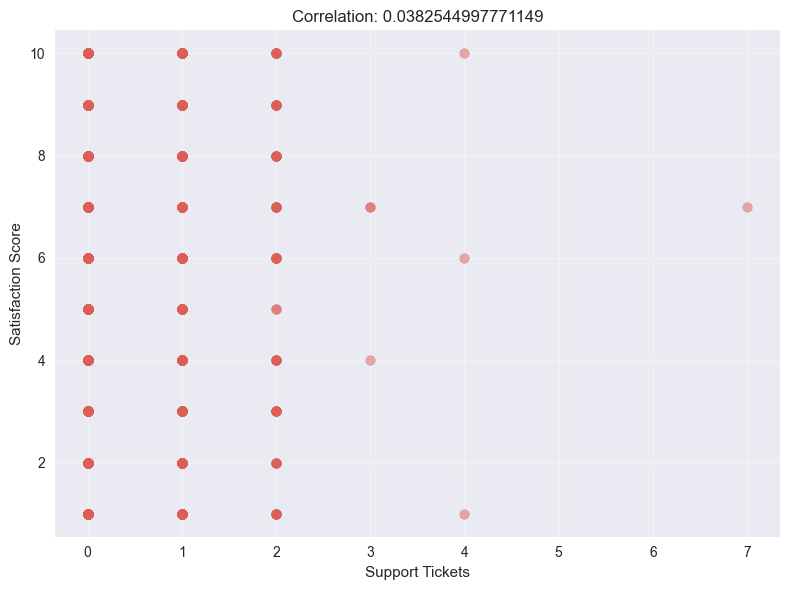

In [207]:
correlation, p_value = pearsonr(data_churn['Support_Tickets'], data_churn['Satisfaction_Score'])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan: {'Ya, berkorelasi negatif signifikan' if (p_value < 0.05 and correlation < 0) else 'Tidak terbukti berkorelasi negatif signifikan'}")

plt.figure(figsize=(8, 6))
plt.scatter(data_churn['Support_Tickets'], data_churn['Satisfaction_Score'], alpha=0.5)
plt.xlabel('Support Tickets')
plt.ylabel('Satisfaction Score')
plt.title(f'Correlation: {correlation}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 17. Dari data Age dan Spending_Score, segmen mana yang paling potensial untuk diiklankan?

,Age_Group,Spending_Category,Count
6,Senior,Low,148
8,Senior,High,146
7,Senior,Medium,130
4,Middle,Medium,108
0,Young,Low,104
3,Middle,Low,102
5,Middle,High,93
2,Young,High,88
1,Young,Medium,81


<Figure size 1000x600 with 0 Axes>

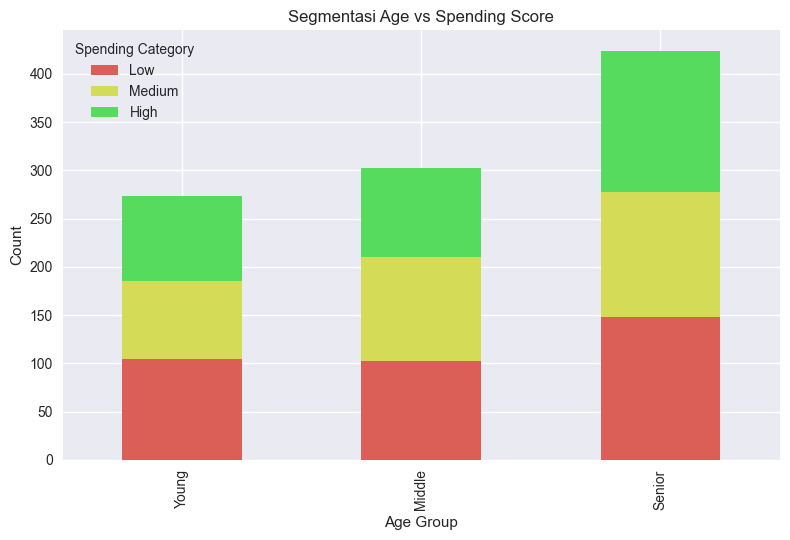


Segmen Potensial: Fokus pada grup dengan Spending_Score tinggi


In [208]:
data_churn['Age_Group'] = pd.cut(data_churn['Age'], bins=[0, 30, 45, 100], labels=['Young', 'Middle', 'Senior'])
data_churn['Spending_Category'] = pd.cut(data_churn['Spending_Score'], bins=3, labels=['Low', 'Medium', 'High'])

segment_analysis = data_churn.groupby(['Age_Group', 'Spending_Category']).size().reset_index(name='Count')
display(segment_analysis.sort_values('Count', ascending=False))

plt.figure(figsize=(10, 6))
pivot_table = data_churn.pivot_table(values='Customer_ID', index='Age_Group', columns='Spending_Category', aggfunc='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True)
plt.title('Segmentasi Age vs Spending Score')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.tight_layout()
plt.show()

print("\nSegmen Potensial: Fokus pada grup dengan Spending_Score tinggi")

# 18. Apakah klik website berkorelasi dengan Online_Spend?

Correlation: 0.0318982054917867
P-value: 0.31359627465809115

Kesimpulan: Tidak berkorelasi signifikan


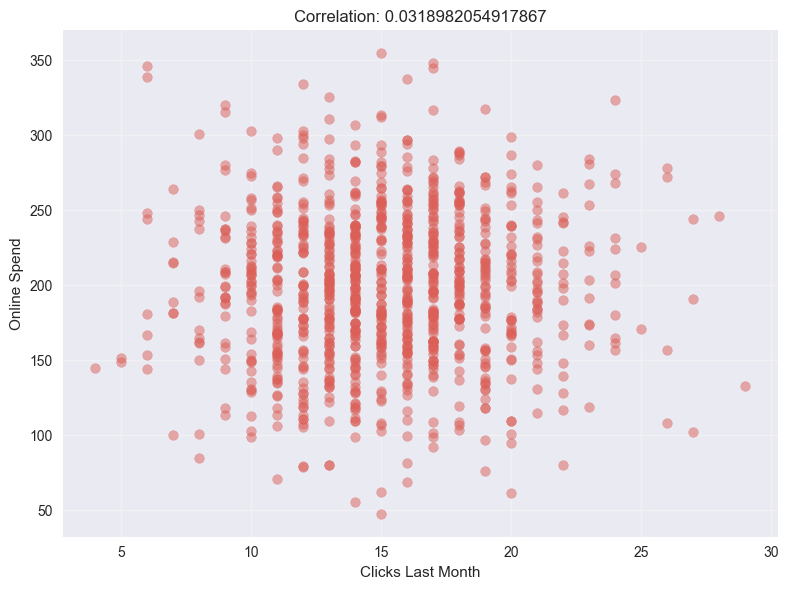

In [209]:
correlation, p_value = pearsonr(data_churn['Clicks_Last_Month'], data_churn['Online_Spend'])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")
print(f"\nKesimpulan: {'Ya, berkorelasi signifikan' if p_value < 0.05 else 'Tidak berkorelasi signifikan'}")

plt.figure(figsize=(8, 6))
plt.scatter(data_churn['Clicks_Last_Month'], data_churn['Online_Spend'], alpha=0.5)
plt.xlabel('Clicks Last Month')
plt.ylabel('Online Spend')
plt.title(f'Correlation: {correlation}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 19. Apakah Churn lebih tinggi pada level keanggotaan tertentu?

Churn,0,1
Membership_Level,,
Basic,80.081301,19.918699
Gold,80.349345,19.650655
Platinum,78.339350,21.660650
Silver,77.419355,22.580645


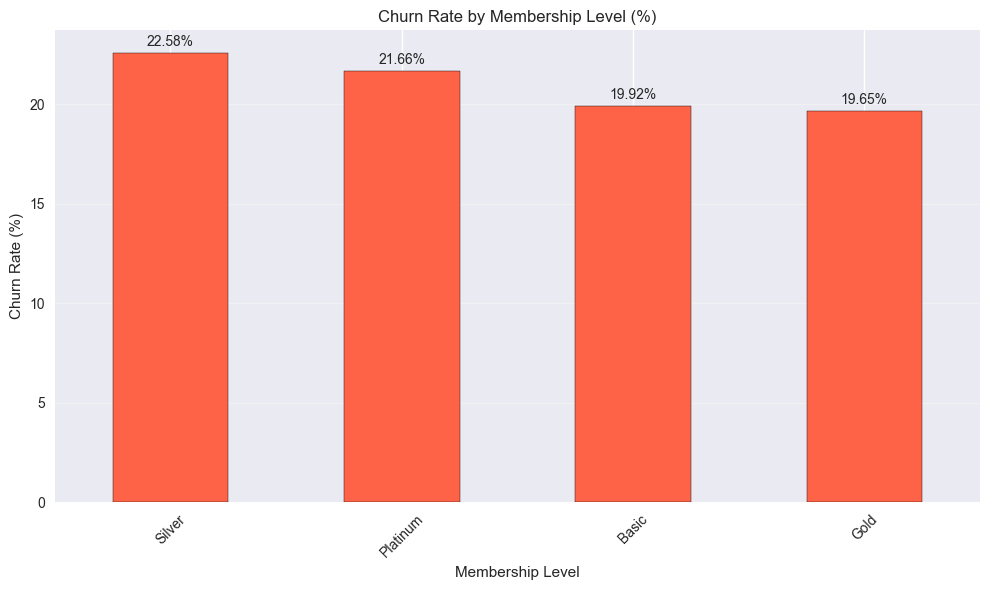


Membership Level dengan churn tertinggi: Silver


In [210]:
churn_by_membership = pd.crosstab(data_churn['Membership_Level'], data_churn['Churn'], normalize='index') * 100
display(churn_by_membership)

plt.figure(figsize=(10, 6))
if 1 in churn_by_membership.columns:
    churn_column = churn_by_membership[1]
else:
    churn_column = churn_by_membership.iloc[:, 1]

ax = churn_column.sort_values(ascending=False).plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Churn Rate by Membership Level (%)')
plt.xlabel('Membership Level')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)
    
plt.tight_layout()
plt.show()

print(f"\nMembership Level dengan churn tertinggi: {churn_column.idxmax()}")

# 20. Visualisasikan dan jelaskan tren Instore_Spend per Region.

,mean,median,std,count
Region,,,,
South,303.641940,300.33,60.413199,268
West,303.203583,302.39,63.740371,254
East,301.855281,301.85,54.148642,231
North,300.128866,298.83,59.877615,247


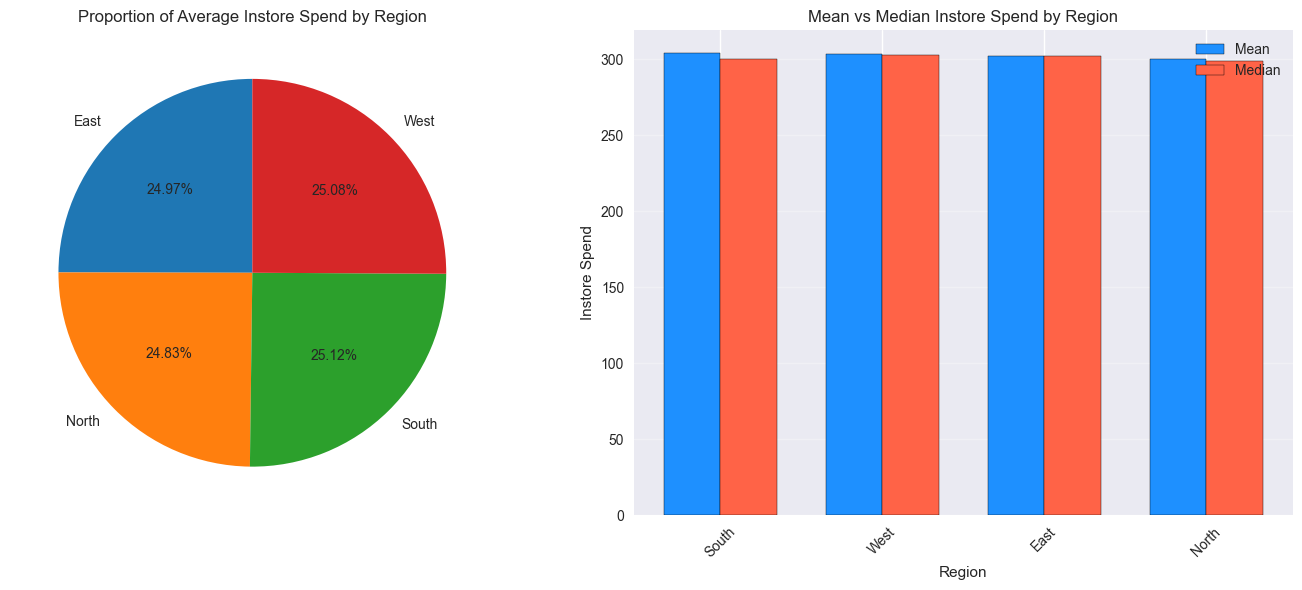


Region dengan rata-rata Instore_Spend tertinggi: South
Region dengan rata-rata Instore_Spend terendah: North


In [211]:
instore_by_region = data_churn.groupby('Region')['Instore_Spend'].agg(['mean', 'median', 'std', 'count'])
display(instore_by_region.sort_values('mean', ascending=False))

plt.figure(figsize=(14, 6))

# Pie Chart - Proporsi Rata-rata Instore Spend
plt.subplot(1, 2, 1)
colors = plt.cm.tab10(range(len(instore_by_region)))
plt.pie(instore_by_region['mean'], labels=instore_by_region.index, autopct='%1.2f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Proportion of Average Instore Spend by Region')

# Bar Chart - Mean vs Median
plt.subplot(1, 2, 2)
x = range(len(instore_by_region))
width = 0.35
regions_sorted = instore_by_region.sort_values('mean', ascending=False)
plt.bar([i - width/2 for i in x], regions_sorted['mean'], width, label='Mean', 
        color='dodgerblue', edgecolor='black')
plt.bar([i + width/2 for i in x], regions_sorted['median'], width, label='Median', 
        color='tomato', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Instore Spend')
plt.title('Mean vs Median Instore Spend by Region')
plt.xticks(x, regions_sorted.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRegion dengan rata-rata Instore_Spend tertinggi: {instore_by_region['mean'].idxmax()}")
print(f"Region dengan rata-rata Instore_Spend terendah: {instore_by_region['mean'].idxmin()}")